In [1]:
import pandas as pd
import numpy as np

from scipy.stats import skewnorm
from scipy.stats import norm
import scipy.stats as stats

import matplotlib.pyplot as plt

import random

from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [2]:
df = pd.read_csv('/content/gdrive/Shared drives/Data Science/01. Colab Notebooks/Purrvaja/Flows/Student Flows Forecasting/Simulations/confidence_intervals.csv')

### Push distribution (Normal Dist) - Source Country

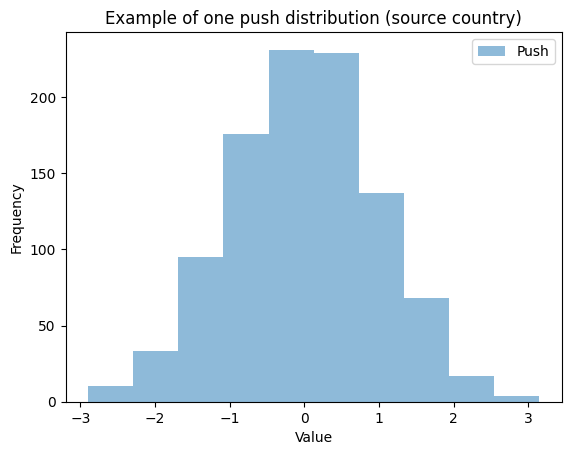

In [ ]:
push_numbers = skewnorm.rvs(a=0, size= 1000)


# Plot the distributions
plt.hist(push_numbers, label="Push", alpha=0.5)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Example of one push distribution (source country)")
plt.legend()
plt.show()

## Creating the pull and disruption distributions

### Gamma Distribution

Chose a gamma distribution to generate the pull, disruption distributions since it allows to set kurtosis, and spread (this distribution is by default skewed to the right).


Experimented with the kurtosis and scale before settling on the below.

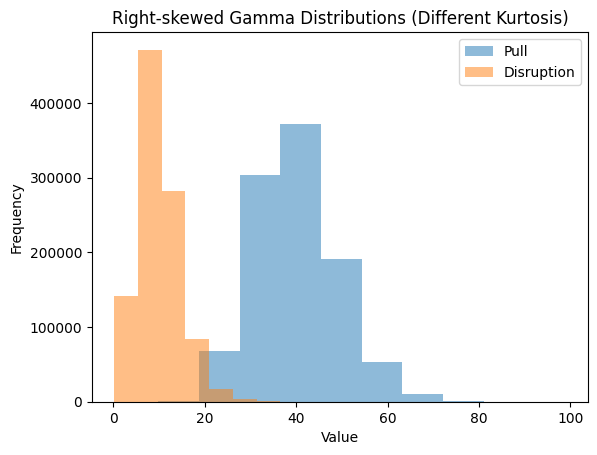

In [7]:
# Define parameters
pull_alpha = 20  # Higher alpha reduces skew and kurtosis (pull)
disruption_alpha = 5 # Lower alpha increases skew and kurtosis (disruption)

beta = 2

# Generate sample distributions
pull_data = stats.gamma.rvs(pull_alpha, scale=beta, size=1000000)

disruption_data = stats.gamma.rvs(disruption_alpha, scale=beta, size=1000000)


# Plot the distributions
plt.hist(pull_data, label="Pull", alpha=0.5)
plt.hist(disruption_data, label="Disruption", alpha=0.5)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Right-skewed Gamma Distributions (Different Kurtosis)")
plt.legend()
plt.show()


Normalizing the Gamma distributions

Decided to normalize the distributions since we are using multiple distributions across.


(pull, disruption - gamma, push - normal)

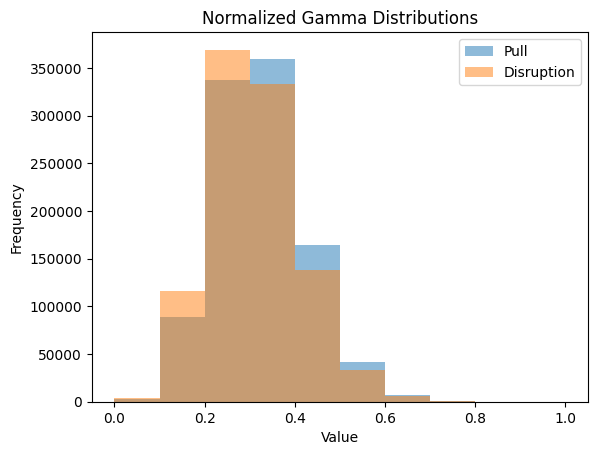

In [ ]:

# Normalize the datasets
# the shape (skew) of the distribution has to remain the same

pull_normalized = ((pull_data - np.min(pull_data))/ (np.max(pull_data) - np.min(pull_data)))
disruption_normalized = ((disruption_data - np.min(disruption_data))/ (np.max(disruption_data) - np.min(disruption_data)))


# Plot the distributions
plt.hist(pull_normalized, label="Pull", alpha=0.5)
plt.hist(disruption_normalized, label="Disruption", alpha=0.5)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Normalized Gamma Distributions")
plt.legend()
plt.show()

Plotting with the PDFs

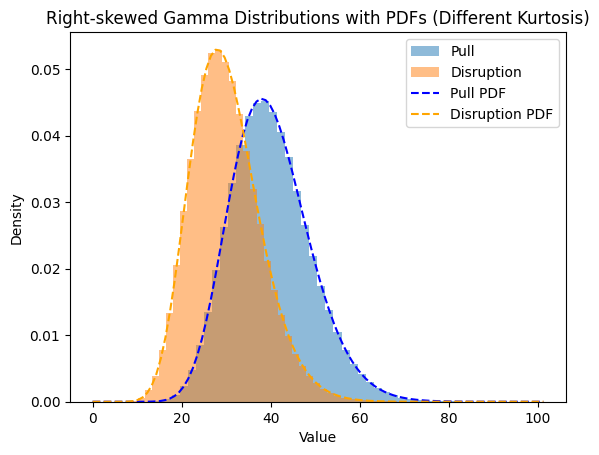

In [ ]:


# Plot the histograms
plt.hist(pull_data, bins=50, label="Pull", alpha=0.5, density=True)
plt.hist(disruption_data, bins=50, label="Disruption", alpha=0.5, density=True)

# Plot the probability density functions (PDFs)
x_values = np.linspace(0, max(np.max(pull_data), np.max(disruption_data)), 100)
pull_pdf = stats.gamma.pdf(x_values, pull_alpha, scale=beta)
disruption_pdf = stats.gamma.pdf(x_values, disruption_alpha, scale=beta)
plt.plot(x_values, pull_pdf, color='blue', linestyle='--', label='Pull PDF')
plt.plot(x_values, disruption_pdf, color='orange', linestyle='--', label='Disruption PDF')

plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Right-skewed Gamma Distributions with PDFs (Different Kurtosis)")
plt.legend()
plt.show()


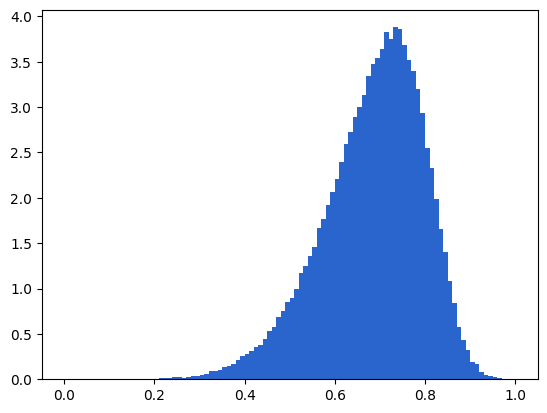

In [ ]:
# Pull Distribution Prototype

numValues = 100000
maxValue = 1
skewness = -3   #Negative values are left skewed, positive values are right skewed.

pull_alternate = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

pull_alternate = pull_alternate - min(pull_alternate)      #Shift the set so the minimum value is equal to zero.
pull_alternate = pull_alternate / max(pull_alternate)      #Standadize all the vlues between 0 and 1.
pull_alternate = pull_alternate * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(pull_alternate,100,density=True, color = '#2965CC', alpha=1)
plt.show()

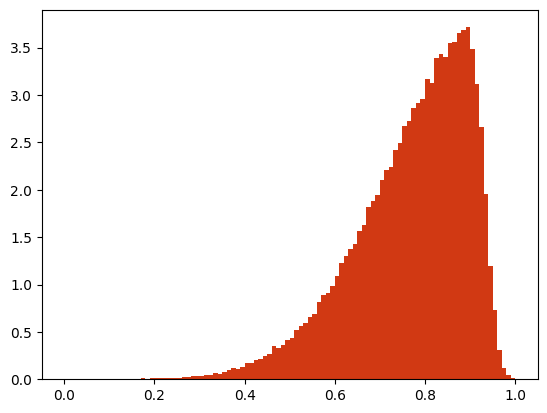

In [ ]:
# Disruption Distribution Prototype

numValues = 100000
maxValue = 1
skewness = -10   #Negative values are left skewed, positive values are right skewed.

disrupt_alternate = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

disrupt_alternate = disrupt_alternate - min(disrupt_alternate)      #Shift the set so the minimum value is equal to zero.
disrupt_alternate = disrupt_alternate / max(disrupt_alternate)      #Standadize all the vlues between 0 and 1.
disrupt_alternate = disrupt_alternate * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(disrupt_alternate,100,density=True, color = '#D13913', alpha=1)
plt.show()

### Stats for the above distributions

In [ ]:


print("Pull distribution - Median: ", np.median(pull_alternate))
print("Pull distribution - Mean: ", np.mean(pull_alternate))

print("Pull distribution - Max: ", np.max(pull_alternate))
print("Pull distribution - Min: ", np.min(pull_alternate))



Pull distribution - Median:  0.6984885527041472
Pull distribution - Mean:  0.6840490970797274
Pull distribution - Max:  1.0
Pull distribution - Min:  0.0


In [ ]:
print("Pull normalized distribution - Median: ", np.median(pull_alternate))
print("Pull normalized distribution - Mean: ", np.mean(pull_alternate))

print("Pull normalized distribution - Max: ", np.max(pull_alternate))
print("Pull normalized distribution - Min: ", np.min(pull_alternate))


Pull normalized distribution - Median:  0.6984885527041472
Pull normalized distribution - Mean:  0.6840490970797274
Pull normalized distribution - Max:  1.0
Pull normalized distribution - Min:  0.0


In [ ]:

print("Disruption distribution - Median: ", np.median(disrupt_alternate))
print("Disruption distribution - Mean: ", np.mean(disrupt_alternate))

print("Disruption distribution - Max: ", np.max(disrupt_alternate))
print("Disruption distribution - Min: ", np.min(disrupt_alternate))

Disruption distribution - Median:  0.7943195139573977
Disruption distribution - Mean:  0.7693297823869115
Disruption distribution - Max:  1.0
Disruption distribution - Min:  0.0


In [ ]:
print("Disruption normalized distribution - Median: ", np.median(disrupt_alternate))
print("Disruption normalized distribution - Mean: ", np.mean(disrupt_alternate))

print("Disruption normalized distribution - Max: ", np.max(disrupt_alternate))
print("Disruption normalized distribution - Min: ", np.min(disrupt_alternate))

Disruption normalized distribution - Median:  0.7943195139573977
Disruption normalized distribution - Mean:  0.7693297823869115
Disruption normalized distribution - Max:  1.0
Disruption normalized distribution - Min:  0.0


In [ ]:
num_countries = len(df['Country'])
num_countries

221

In [ ]:
# for each country there has to be a distribution (push)
# each distribution (country) will have a bunch of numbers
# from that we pick out one number as the push number for that particular country



In [ ]:


def monte_carlo_simulation(lower_confidence_intervals, upper_confidence_intervals,middle_confidence_intervals, pull_distribution, disruption_distribution, num_simulations):
    global_distributions = []


    for _ in range(num_simulations):
        country_sums = []

        # Pick a pull number and disruption number for each simulation
        pull_number = np.random.choice(pull_distribution)
        disruption_number = np.random.choice(disruption_distribution)

        for i in range(num_countries):

            # create a normal distribution for the country
            push_numbers = skewnorm.rvs(a=0, size= 1000)
            push_normalized = ((push_numbers - np.min(push_numbers))/ (np.max(push_numbers) - np.min(push_numbers)))

            # pick one number randomly from the distribution
            # Change to a uniform distribution, not a normal distribution
            rng = np.random.default_rng()
            push_number = rng.random()

            # Calculate the weighted number
            weighted_number = (0.5 * push_number + 0.0 * pull_number + 0.5 * disruption_number)

            #==============================================================================================================================================#

            # Using the weighted_number to pick out a point from the country's distribution

            # Creating the country's distribution based on it's lower, upper, middle values
            lower = lower_confidence_intervals[i]
            upper = upper_confidence_intervals[i]
            middle = middle_confidence_intervals[i]

            # creating a triangular distribution for the country based on stats
            country_dist = stats.triang(c=(middle - lower) / (upper - lower), loc=lower, scale=upper - lower)

            # Generate random numbers from the triangular distribution
            data = country_dist.rvs(size=1000)

            # picking out a number from the distribution based on the quantile
            picked_number = country_dist.ppf(weighted_number)


            """
            Inverse Cdf of triangular distribution (another method to pick out a number based on the quantile)
            if percentile <= (middle - lower)/ (upper - lower):
              picked_number = lower + np.sqrt(percentile * (middle - lower) * (upper - lower))

            else:
              picked_number = upper - np.sqrt((1 - percentile) * (upper - middle) * (upper - lower))
            """

            country_sums.append(picked_number)

        # Sum the volumes from all countries
        global_distributions.append(sum(country_sums))


    return global_distributions



In [ ]:
#100 iterations (test)

# Perform Monte Carlo simulation
global_distribution = monte_carlo_simulation(df['Lower'], df['Upper'], df['Middle'], pull_normalized, disruption_normalized,num_simulations=100)

# Calculate global confidence intervals
lower_global_ci = np.percentile(global_distribution, 2.5)
upper_global_ci = np.percentile(global_distribution, 97.5)
median_global_volume = np.median(global_distribution)

print("Lower global confidence interval:", lower_global_ci)
print("Median global volume:", median_global_volume)
print("Upper global confidence interval:", upper_global_ci)



Lower global confidence interval: 1282937.4461970862
Median global volume: 1349563.3468003124
Upper global confidence interval: 1433930.6854992667


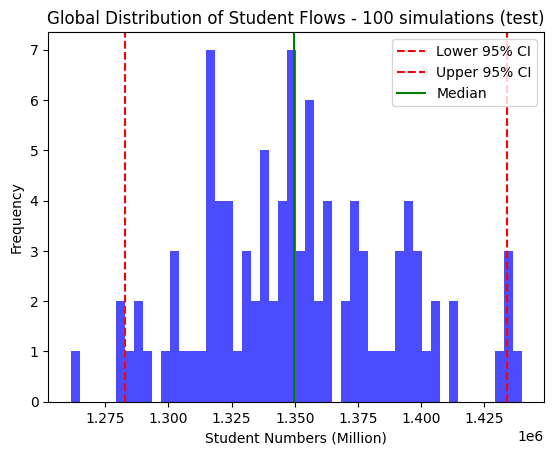

In [ ]:
# Plotting the above distribution

plt.hist(global_distribution, bins=50, color='blue', alpha=0.7)
plt.axvline(x=lower_global_ci, color='red', linestyle='--', label='Lower 95% CI')
plt.axvline(x=upper_global_ci, color='red', linestyle='--', label='Upper 95% CI')
plt.axvline(x=median_global_volume, color='green', linestyle='-', label='Median')
plt.title('Global Distribution of Student Flows - 100 simulations (test)')
plt.xlabel('Student Numbers (Million)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

